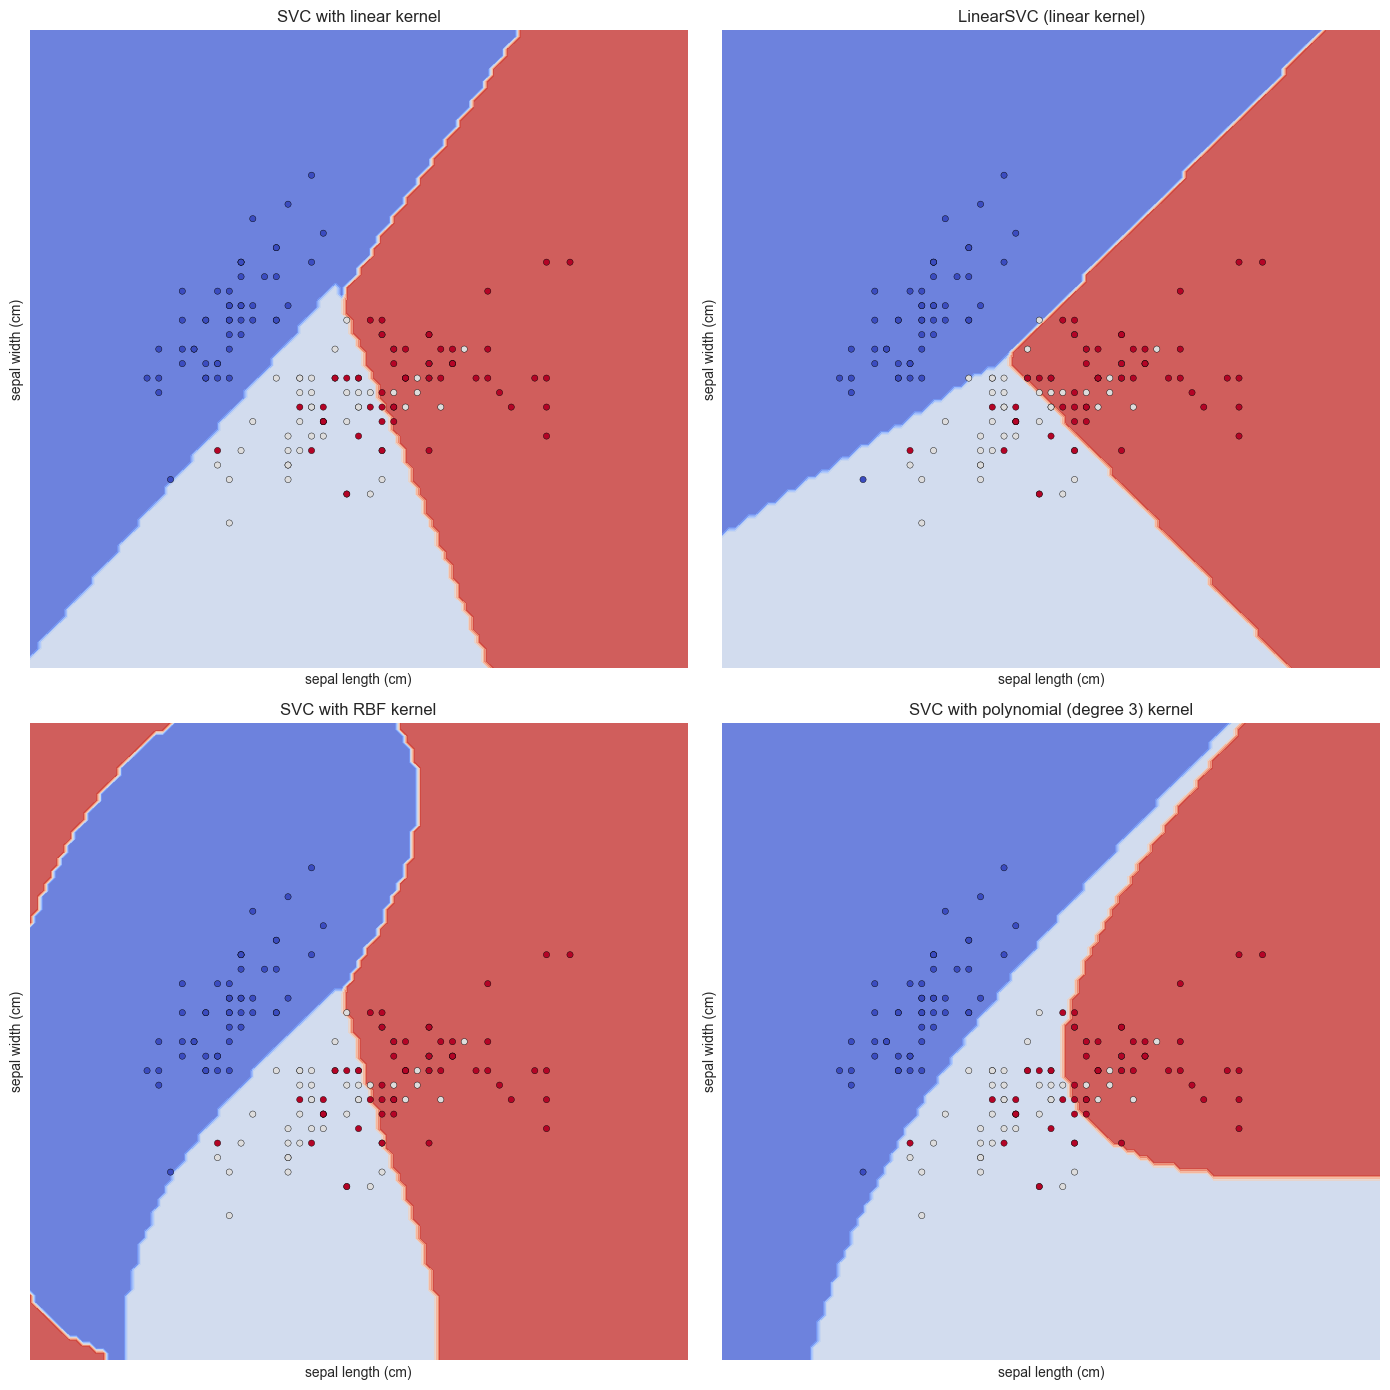

In [1]:
# 导入操作系统库
import os
# 更改工作目录
os.chdir(r"D:\softwares\applied statistics\pythoncodelearning\chap3\sourcecode")
# 导入绘图库
import matplotlib.pyplot as plt
# 导入支持向量机模型
from sklearn import svm
# 导入决策边界可视化工具
from sklearn.inspection import DecisionBoundaryDisplay
# 导入iris数据集
from sklearn.datasets import load_iris
# 导入绘图库中的字体管理包
from matplotlib import font_manager
# 实现中文字符正常显示
font = font_manager.FontProperties(fname=r"C:\Windows\Fonts\SimKai.ttf")
# 使用seaborn风格绘图
plt.style.use("seaborn-v0_8")
# 生成样本
iris = load_iris()
# 取前两个变量
X = iris.data[:, :2]
y = iris.target
# 惩罚系数
C = 1.0  # SVM regularization parameter
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000),
    svm.SVC(kernel="rbf", gamma=0.7, C=C), # 径向核函数
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C) # 多项式核
)
# 模型拟合
models = (clf.fit(X, y) for clf in models)
# 绘图标题 
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)
# 开始画图
fig, sub = plt.subplots(2, 2, figsize=(14,14), tight_layout=True)
plt.subplots_adjust(wspace=0.4, hspace=0.4)
# 第一、二个维度的X
X0, X1 = X[:, 0], X[:, 1]
for clf, title, ax in zip(models, titles, sub.flatten()):
    # 绘制决策边界
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
    )
    # 绘制散点图
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
plt.show()
fig.savefig("../codeimage/code3.pdf")
